In [1]:
import numpy as np
import pandas as pd

In [2]:
d = pd.read_csv('/content/heart_missing.csv',sep=',')

In [3]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212,0.0,1.0,168,0,1.0,2,2,3,0
1,53,1,0.0,140,203,1.0,0.0,155,1,3.1,0,0,3,0
2,70,1,0.0,145,174,0.0,1.0,125,1,2.6,0,0,3,0
3,61,1,0.0,148,203,0.0,1.0,161,0,0.0,2,1,3,0
4,62,0,0.0,138,294,1.0,1.0,106,0,1.9,1,3,2,0


In [4]:
d.isna().sum()

age          0
sex          0
cp           7
trestbps     0
chol         0
fbs         13
restecg      4
thalach      0
exang        0
oldpeak     11
slope        0
ca           0
thal         0
target       0
dtype: int64

In [5]:
v1 = d['cp'].mode()[0]
q1 = d['cp'].fillna(v1,inplace=True)

v2 = d['fbs'].mode()[0]
q2 = d['fbs'].fillna(v2,inplace=True)

v3 = d['restecg'].mode()[0]
q3 = d['restecg'].fillna(v3,inplace=True)

v4 = d['oldpeak'].mode()[0]
q4 = d['oldpeak'].fillna(v4,inplace=True)

In [6]:
d.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
x = d.iloc[:,:-1].values
y = d.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.30,random_state=42)

In [9]:
y_te

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_tr)
x_tr_n = sc.transform(x_tr)
x_te_n = sc.transform(x_te)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier(n_neighbors=5)
k.fit(x_tr_n,y_tr)
y_pred = k.predict(x_te_n)

In [12]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
conf = confusion_matrix(y_te,y_pred)
acc = accuracy_score(y_te,y_pred)

In [14]:
conf

array([[130,  29],
       [ 20, 129]])

In [15]:
acc

0.8409090909090909

In [16]:
p = k.predict(sc.transform([[49,1,0,110,0,0,102,0,2,0,1,2,1]]))

In [17]:
p

array([0])

In [18]:
d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212,0.0,1.0,168,0,1.0,2,2,3,0
1,53,1,0.0,140,203,1.0,0.0,155,1,3.1,0,0,3,0
2,70,1,0.0,145,174,0.0,1.0,125,1,2.6,0,0,3,0
3,61,1,0.0,148,203,0.0,1.0,161,0,0.0,2,1,3,0
4,62,0,0.0,138,294,1.0,1.0,106,0,1.9,1,3,2,0


In [20]:
label = [1,0]
di = ConfusionMatrixDisplay(conf,display_labels=label)

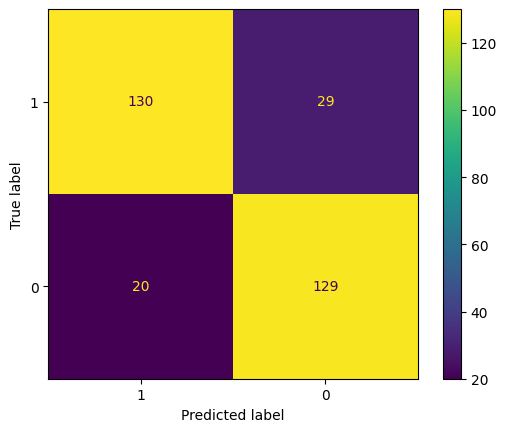

In [22]:
di.plot()